In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind, fisher_exact
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import operator
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from numpy import interp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import scipy.stats as stats



In [2]:
data = pd.read_csv(filepathname.csv', index_col='#SampleID')
print(data.shape)
y = pd.read_csv(filepathname.csv')['ACE']
data.drop('ACE', axis = 1, inplace=True)
data.shape


(24, 99)


(24, 98)

In [3]:
# PCA + RF Analysis to find top features
# 1) PCA
X = data
pca = PCA(n_components=0.98)
X_reduced = pca.fit_transform(data)
pca.explained_variance_ratio_

Comp_p2 = pd.DataFrame(pca.components_, columns=X.columns).T**2
Comp_p2['sum'] = Comp_p2.sum(axis=1)
X_20PCA_Reduced = X[Comp_p2.sort_values(by='sum',ascending=False).index[0:20]]
# 2) RF
p = X_20PCA_Reduced

m = np.zeros(p.shape[1]).tolist()
for i in range(100):
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200)
    model = rf.fit(p, y)
    m1 =  model.feature_importances_.tolist()
    m = list(map(operator.add, m,m1))
# to make a table for important features
n = p.columns.tolist()
np.append([m],[n], axis=0)
fe_imp= pd.DataFrame(np.append([m],[n], axis=0)).T
fe_imp[0] = fe_imp[0].astype(float)#**6
fe_imprt = fe_imp.sort_values(by=[0], ascending=False)#.iloc[0:20]


In [4]:
fe_imprt.to_csv('features.csv')

In [5]:
%pwd

X_20PCA_Reduced.shape

pd.DataFrame(X_reduced)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.186703,0.067469,0.003496,0.021619,-0.040935,-0.029897,-0.052436,-0.005156,-0.012954,-0.004713,0.003150,-0.034306
1,0.051684,-0.088007,-0.055067,-0.039281,-0.013891,0.017876,0.069670,-0.038062,0.047085,0.065981,-0.017305,0.030979
2,0.317556,0.023670,0.054762,0.006117,-0.056288,0.110861,0.101869,0.125705,-0.034121,-0.011341,-0.002164,-0.004887
3,-0.136006,-0.026224,-0.106712,0.144676,-0.014113,0.040343,-0.019798,-0.015099,-0.026079,-0.067958,-0.064884,-0.008985
4,-0.192220,-0.131956,-0.106432,-0.157738,0.003653,0.023957,-0.004665,0.015058,-0.003896,0.015672,-0.043939,-0.014060
5,-0.102646,0.296132,0.058303,0.114466,0.026320,0.031174,-0.016224,0.027827,0.076972,0.045165,0.010785,0.002891
6,0.205151,-0.095787,-0.044116,0.007888,-0.028945,-0.046608,-0.047001,0.010009,0.043363,-0.020999,-0.018721,-0.000468
7,0.180772,0.015081,0.123386,0.027596,-0.037238,0.000841,-0.018778,-0.056060,0.041700,0.019274,-0.029818,0.020860
8,0.000167,0.144545,0.032435,-0.036894,0.009356,-0.049007,-0.025841,0.031223,0.006471,0.022271,0.021638,-0.004001
9,-0.143746,0.294823,0.084967,-0.078228,0.033503,-0.071665,0.070098,-0.009583,-0.036029,-0.027460,-0.024789,0.014441


In [6]:
%pwd

'/Users/neginkazemian'

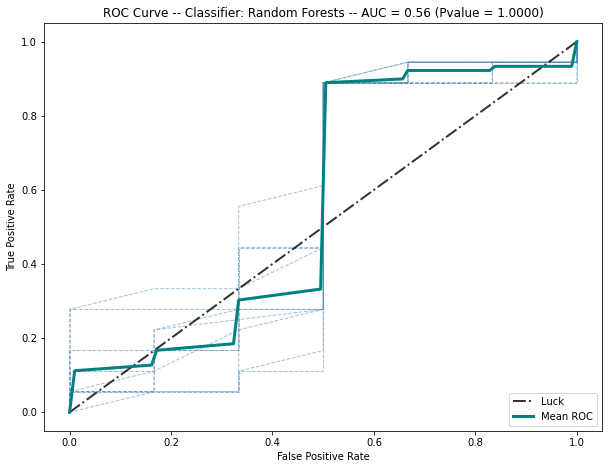

p_value:  1.0
pvals list : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
confusion matrix list [array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]]), array([[ 0,  6],
       [ 1, 17]])]


In [7]:
## Plot ROC Curve and measure the model accuracy
x = X_20PCA_Reduced
cv=  LeaveOneOut()
scores = []
y_tests = []
y_predicts = []
y_predictions = []
tprs = []
aucs = []
rf_confs = [] 
pvals = []
mean_fpr = np.linspace (0, 1, 100)
plt.figure(figsize=(10, 7.5))
for i in range(10):
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features = 'auto')
    rf_acc = cross_val_score(rf, x, y, cv=cv, n_jobs=-1)
    rf_proba = cross_val_predict(rf, x,y, cv=cv, method='predict_proba')
    rf_confusion = cross_val_predict(rf, x, y, cv=cv)
    rf_conf = confusion_matrix(y,rf_confusion)    
    _, p_value = fisher_exact(rf_conf)
    pvals.append(p_value)
    rf_confs.append(rf_conf)
    rf_scores = rf_proba[:, 1] # Get the probability of the positive class
    fpr, tpr, thresholds = roc_curve(y,rf_scores)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.5,c='steelblue',linestyle='--')
    i += 1
    scores.append(rf_acc)
    y_tests.append(y)
    y_predicts.append(rf_scores)
    y_predictions.append(rf_confusion)
plt.plot([0, 1], [0, 1], linestyle='-.', lw=2, color='black',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
rf_confs_mean = np.mean(rf_confs,axis=0)
_, pval = fisher_exact(rf_confs_mean)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='teal', label=r'Mean ROC' ,lw=3, alpha=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(r'ROC Curve -- Classifier: Random Forests -- AUC = %0.2f (Pvalue = %0.4f)' % (mean_auc,pval))
plt.legend(loc="lower right")
plt.show()
print("p_value: " ,pval)
print("pvals list :", pvals)
print("confusion matrix list", rf_confs)


